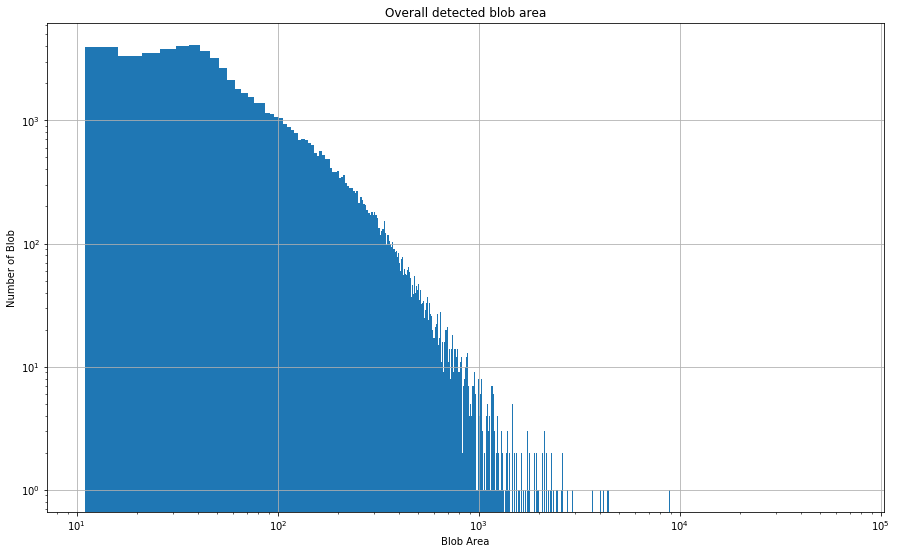

The area of the smallest and largest detected blob are 11 and 67103, respectively. The number of small blobs is much more than the number of large blobs (area ~ 1000). There is a peak at 36. The number of large blobs are much less than the number of small blobs. Except the peak at 36, there are no other significant peak and the reason is unknown. 

Detected blobs with area around this peak are either small cells or fragments. If we can confirm they are every where in the brain(stem) and cannot provide typical features in different annotated structure, then they can be eliminated when we do the blob matching. The problems are:
1. If they are everywhere, how to justify this argument by quantitative measurement? 
    * Analyze the features of these small blobs and plot their feature distribution through the brain?
2. How to set the threshold of size for elimination?
    * There are not obvious "boundary" between large blobs and small blobs

For blob area larger than 2000, we are pretty sure that most of the blob are not single cells, as shown in the following images.

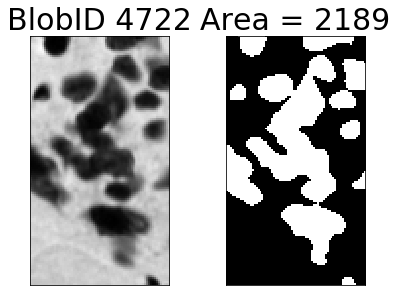

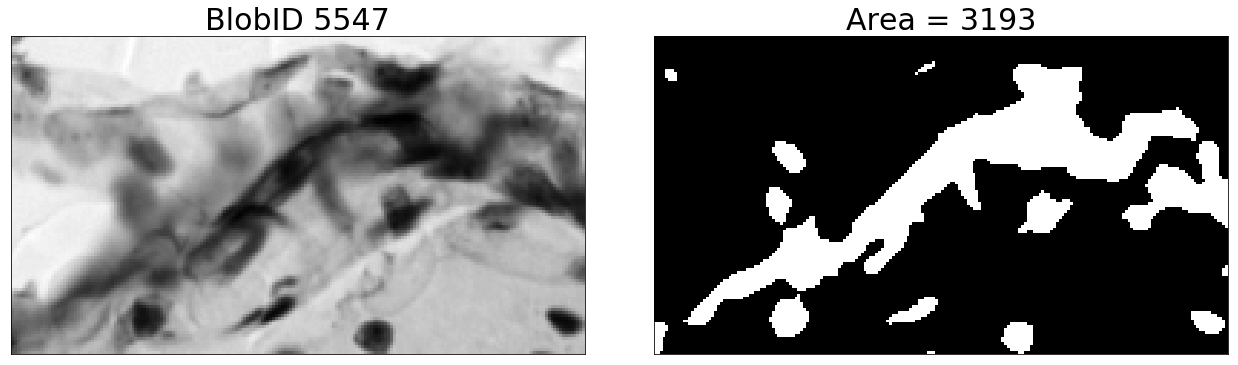

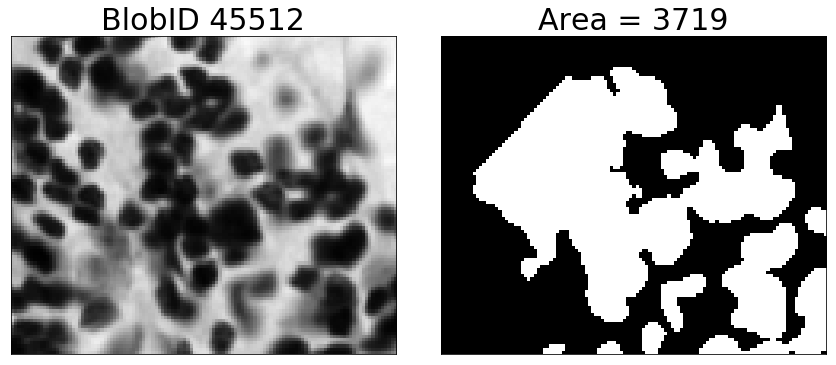

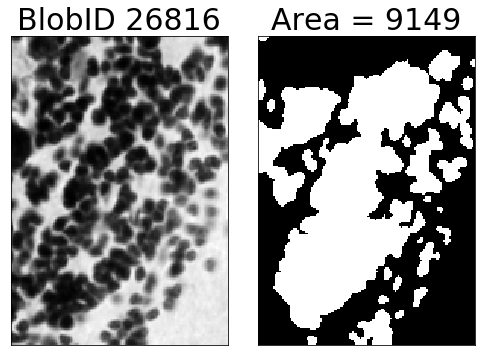

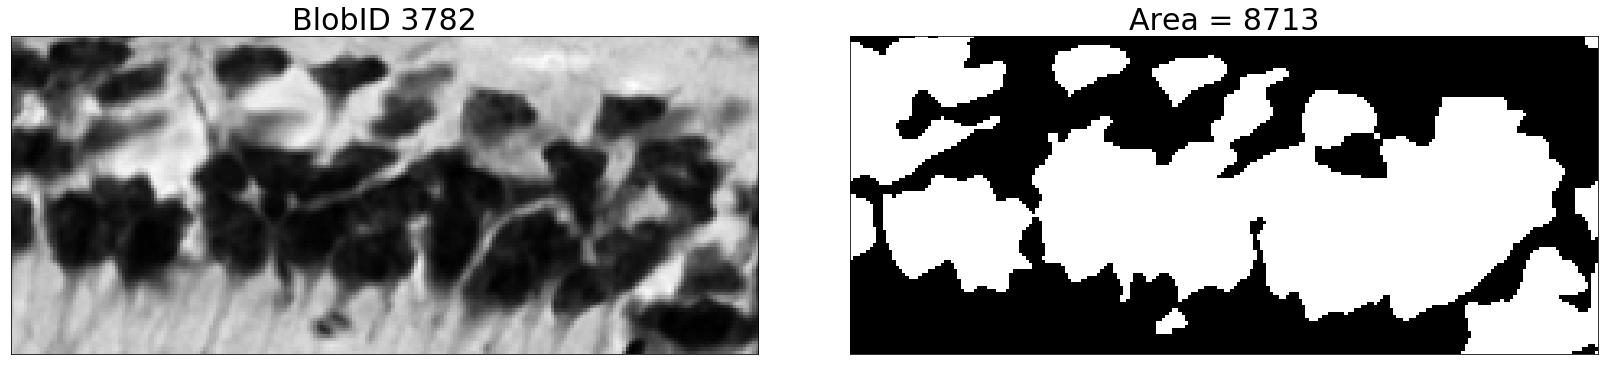

In [62]:
# Visualize large blobs (size between 2000 and 10000 pixels)

After eliminating the blobs with area larger than 2000, the area histroram is plot with a linear x-axis:

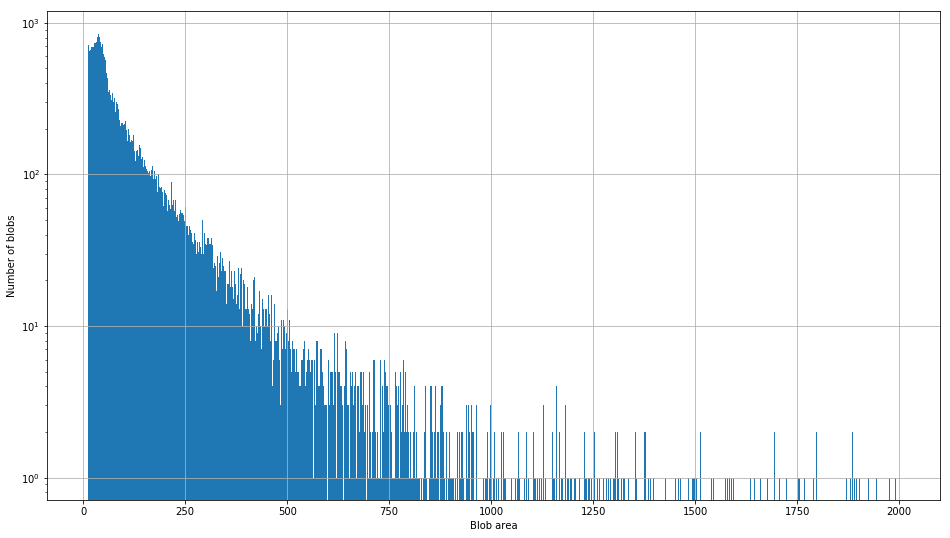

In [20]:
# Histogram for the area of blobs. Eliminate blobs larger than 2000 pixels

In [89]:
# cell_idx_vis = np.where(cell_area_0<stat_size_max)[0]
cell_idx_vis = np.where(np.logical_and(cell_area_0> 100, cell_area_0 < 2000))[0]
for blobID in cell_idx_vis:
    blob_coords = im_blob_prop[sec][blobID]['coords']
    fig_size_dist[blob_coords[:,0],blob_coords[:,1]] = im_blob_prop[sec][blobID]['area']

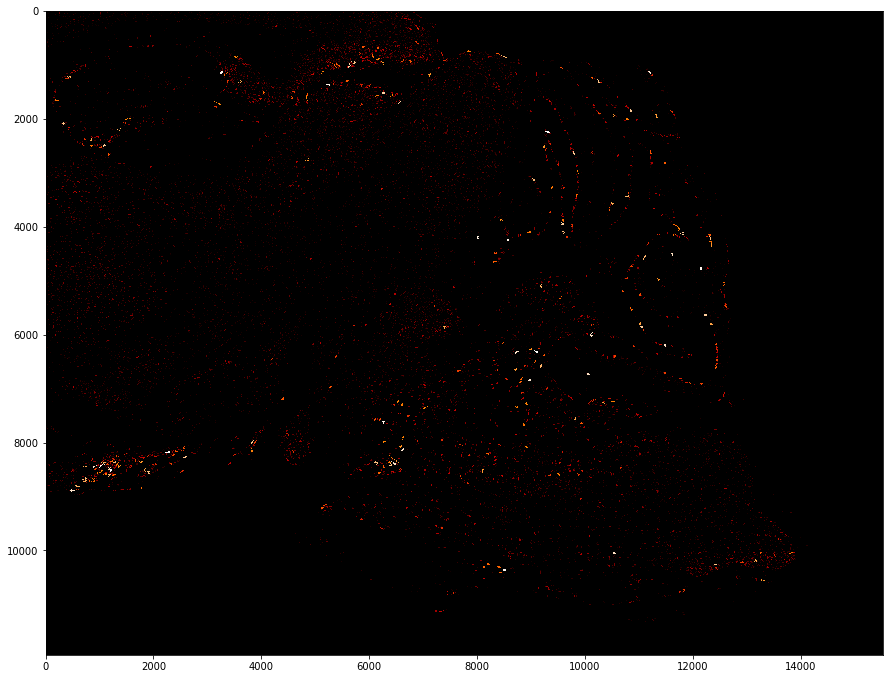

In [93]:
# Visualize all the blobs whose areas are in (100, 2000) pixels

Some of the detected blobs are certainly not single cells, but the overlap of many cells. These blobs generally has complicated boundary. Here we construct a new feature `periSqd2Area` defined as:

$$\frac{Perimeter^2}{Area}$$

which can characterize the complicated boundary. For some simple shape, we have:
 * Disk: 4$\pi$
 * Square: 16
 * Rectangle: $8 + 4(\frac ab + \frac ba)$

I gauss the smallest number of this feature is $4\pi$, which is given by disk. However, the perimeters and area here are measured based on pixels. Therefore, we can get blob with this feature lower than $4\pi$ when the size of blob is small (typically below 100 pixels), as shown in the following scatter plot.  

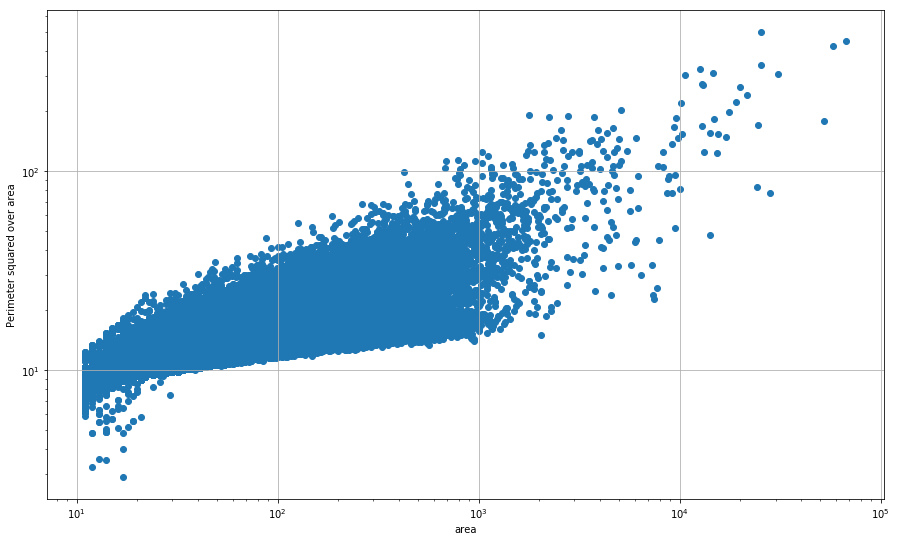

In [85]:
# Scatter plot of (Perimeter squared over area) vs. Area

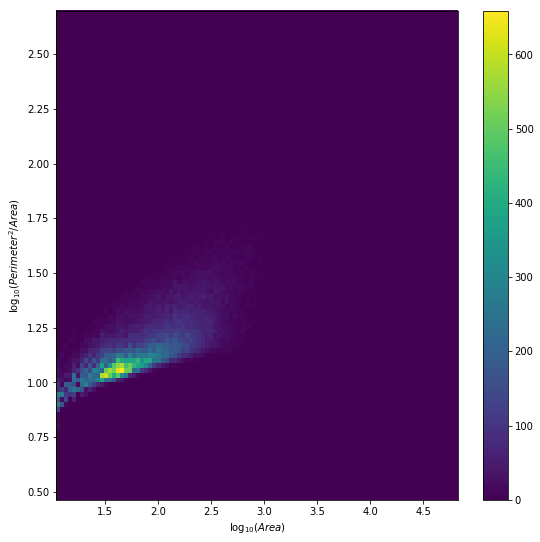

In [112]:
# Same, 2D histogram version of the scatter plot

The following histrogram shows the value of this feature for all the detected blobs in section 152. 

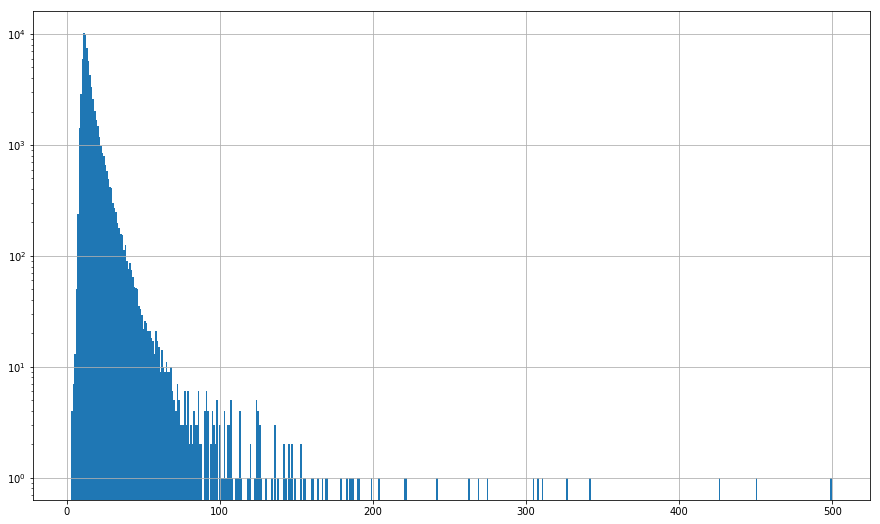